# Statistiche questionari utente

In [1]:
import sys
print(sys.executable)


/home/moeasy/.local/share/pipx/venvs/notebook/bin/python


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, scipy.stats as st
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from scipy.stats import wilcoxon


from IPython.display import display, HTML

# palette colori:
palette_c = ['#ceddf0', '#94cce7', '#21a2d0', '#128aa3', '#1c62ba']
app = ['Apple Music', 'Tidal']

questionario1 = pd.read_csv('Questionario ' + app[0] + '.csv', index_col = 0)
questionario2 = pd.read_csv('Questionario ' + app[1] + '.csv', index_col = 0)
display(questionario1.head(32))
print('\n________________________________________\n')
display(questionario2.head(32))

,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,...,Sconosciuto2,Sconosciuto3,Sconosciuto4,Sconosciuto5,Sconosciuto6,Sconosciuto7,Sconosciuto8,Sconosciuto9,Sconosciuto10,Sconosciuto11
genere,Maschio,Femmina,Femmina,Femmina,Femmina,Femmina,Femmina,Maschio,Femmina,Maschio,...,Maschio,Femmina,Femmina,Maschio,Maschio,Maschio,Maschio,Maschio,Maschio,Femmina
eta,24,23,22,26,20,22,52,55,52,50,...,31,22,25,26,20,20,19,19,19,21
situazione lavorativa,Studente,Studente,Studente,Lavoratore,Studente,Studente,Lavoratore,Lavoratore,Lavoratore,Lavoratore,...,Lavoratore,Lavoratore,Studente,Studente,Studente,Studente,Lavoratore,Studente,Lavoratore,Lavoratore
istruzione,Laurea Triennale,Laurea Triennale,Diploma,Laurea Magistrale,Diploma,Laurea Triennale,Diploma,Diploma,Diploma,Diploma,...,Laurea Triennale,Diploma,Laurea Triennale,Laurea Triennale,Diploma,Diploma,Diploma,Diploma,Diploma,Diploma
fastidioso-piacevole,7,4,6,4,5,5,3,5,6,5,...,7,5,7,5,5,6,5,2,6,6
incomprensibile-comprensibile,7,5,6,3,6,5,1,5,6,5,...,6,5,7,5,5,5,6,3,6,5
creativo-privo di fantasia,4,6,2,4,4,4,3,5,3,6,...,4,3,3,6,4,4,4,5,6,4
facile da apprendere-difficile da apprendere,1,2,2,5,3,2,7,4,3,3,...,2,2,3,2,3,4,6,4,1,2
di grande valore-di poco valore,2,4,4,4,4,4,3,4,4,6,...,4,3,4,3,4,4,7,4,1,4
noioso-appassionante,6,4,4,4,5,4,1,5,4,2,...,5,6,4,2,4,4,4,3,4,4



________________________________________



,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,...,Sconosciuto2,Sconosciuto3,Sconosciuto4,Sconosciuto5,Sconosciuto6,Sconosciuto7,Sconosciuto8,Sconosciuto9,Sconosciuto10,Sconosciuto11
genere,Maschio,Femmina,Femmina,Femmina,Femmina,Femmina,Femmina,Maschio,Femmina,Maschio,...,Maschio,Femmina,Femmina,Maschio,Maschio,Maschio,Maschio,Maschio,Maschio,Femmina
eta,24,23,22,26,20,22,52,55,52,50,...,31,22,25,26,20,20,19,19,19,21
situazione lavorativa,Studente,Studente,Stuedente,Lavoratore,Studente,Studente,Lavoratore,Lavoratore,Lavoratore,Lavoratore,...,Lavoratore,Lavoratore,Studente,Studente,Studente,Studente,Lavoratore,Studente,Lavoratore,Lavoratore
istruzione,Laurea Triennale,Laurea Triennale,Diploma,Laurea Magistrale,Diploma,Laurea Triennale,Diploma,Diploma,Diploma,Diploma,...,Laurea Triennale,Diploma,Laurea Triennale,Laurea Triennale,Diploma,Diploma,Diploma,Diploma,Diploma,Diploma
fastidioso-piacevole,7,6,4,5,3,5,2,3,5,5,...,7,5,7,5,5,6,5,2,6,6
incomprensibile-comprensibile,6,6,6,6,3,5,1,3,5,5,...,6,5,7,5,5,5,6,3,6,5
creativo-privo di fantasia,4,5,3,4,3,4,6,3,4,6,...,4,3,3,6,4,4,4,5,6,4
facile da apprendere-difficile da apprendere,1,2,3,5,4,3,7,3,3,3,...,2,2,3,2,3,4,6,4,1,2
di grande valore-di poco valore,2,4,4,4,3,4,6,5,5,6,...,4,3,4,3,4,4,7,4,1,4
noioso-appassionante,6,4,3,4,5,4,1,3,4,2,...,5,6,4,2,4,4,4,3,4,4


## General stats:



Gender stats


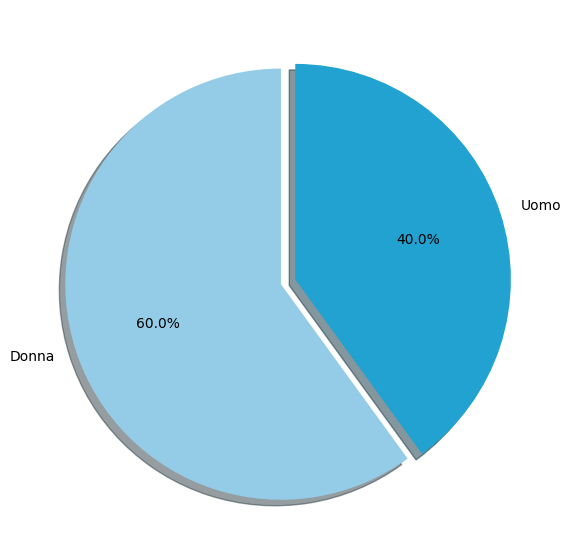



Job stats


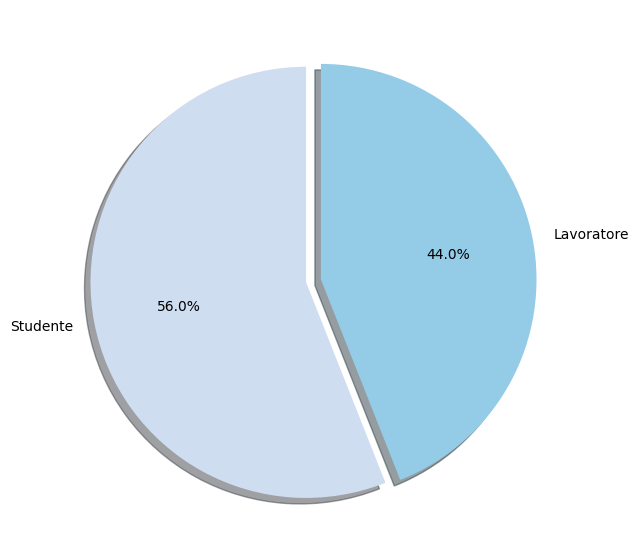



Education stats


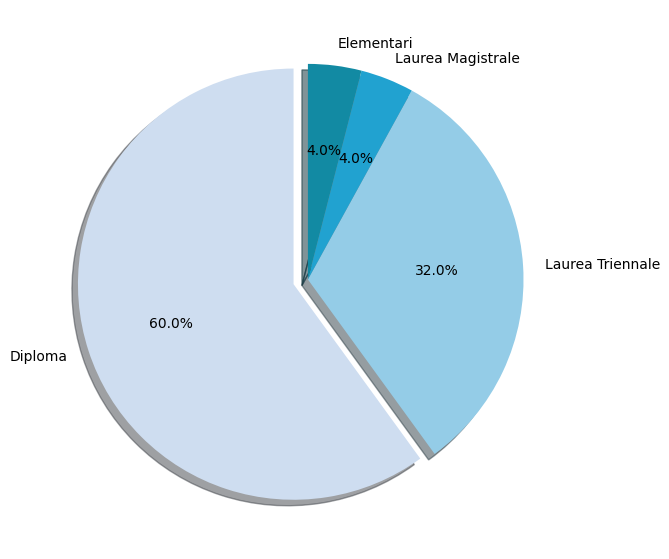



Age stats


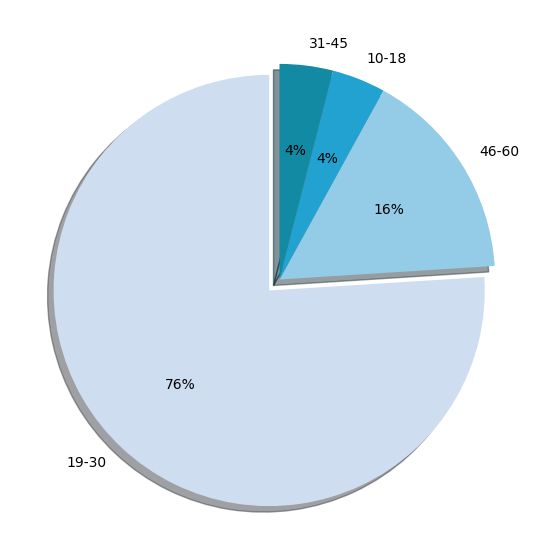

In [3]:
# gender stats
print('\n\nGender stats')
labels = ['Donna', 'Uomo']
sizes = questionario1.loc['genere'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c[1:3])
plt.show()


# job stats
print('\n\nJob stats')
labels = questionario1.loc['situazione lavorativa'].value_counts().index
sizes = questionario1.loc['situazione lavorativa'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()



# education stats
print('\n\nEducation stats')
labels = questionario1.loc['istruzione'].value_counts().index
sizes = questionario1.loc['istruzione'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()


# age stats
print('\n\nAge stats')
age_class = [10, 18, 30, 45, 60, 110]
labels = ['10-18', '19-30', '31-45', '46-60', '60+']
etas = [int(ele) for ele in questionario1.loc['eta']]
df_age = pd.DataFrame({'age': etas, 'group': pd.cut(etas, bins = age_class, labels = labels, right=False)})

sizes = df_age['group'].value_counts()
sizes = sizes[sizes != 0] # drop 0 value
labels = list(sizes.index)

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.0f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()



## Per ogni domanda vengono mostrate min, max, media, mediana, std e un boxplot riassuntivo e comparativo tra i due sistemi

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,2.0,7.0,5.12,1.332917,5.0,"[4.57, 5.67]",+/- 0.55
Tidal,2.0,7.0,5.0,1.384437,5.0,"[4.429, 5.571]",+/- 0.571


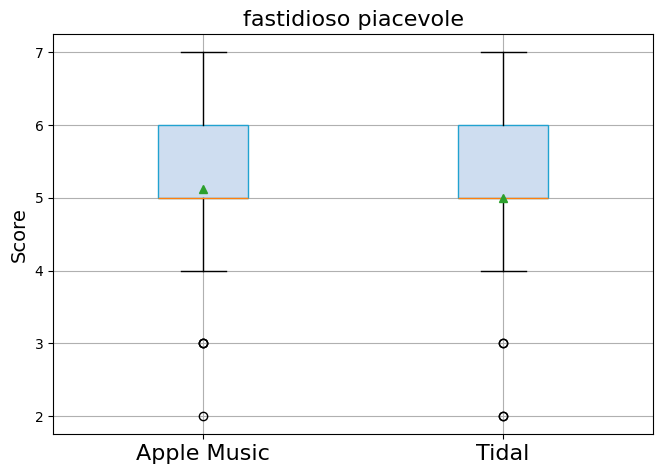

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,7.0,4.88,1.536229,5.0,"[4.246, 5.514]",+/- 0.634
Tidal,1.0,7.0,4.92,1.351542,5.0,"[4.362, 5.478]",+/- 0.558


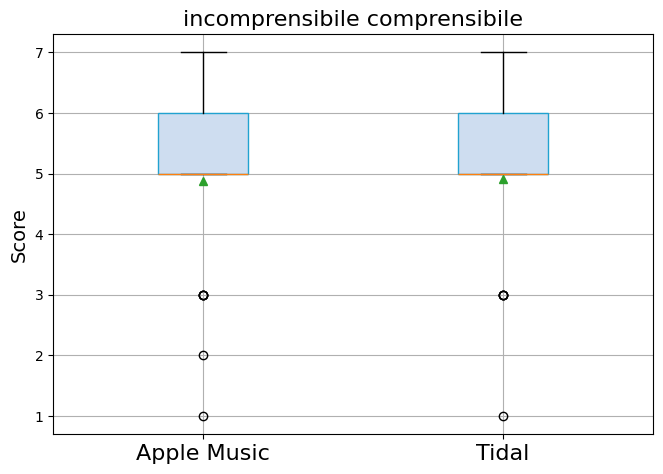

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,6.0,3.76,1.392839,4.0,"[3.185, 4.335]",+/- 0.575
Tidal,1.0,6.0,4.04,1.206924,4.0,"[3.542, 4.538]",+/- 0.498


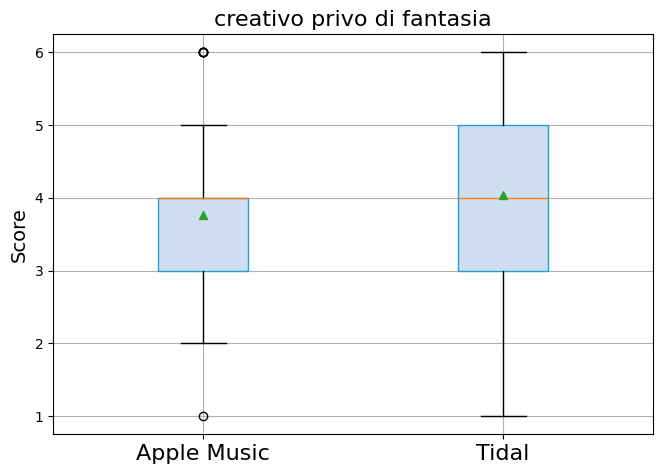

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,7.0,3.32,1.573743,3.0,"[2.67, 3.97]",+/- 0.65
Tidal,1.0,7.0,3.12,1.452584,3.0,"[2.52, 3.72]",+/- 0.6


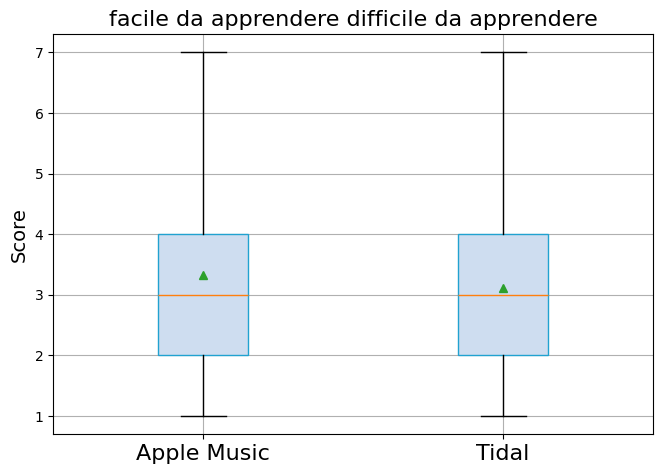

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,7.0,3.84,1.106044,4.0,"[3.383, 4.297]",+/- 0.457
Tidal,1.0,7.0,4.0,1.224745,4.0,"[3.494, 4.506]",+/- 0.506


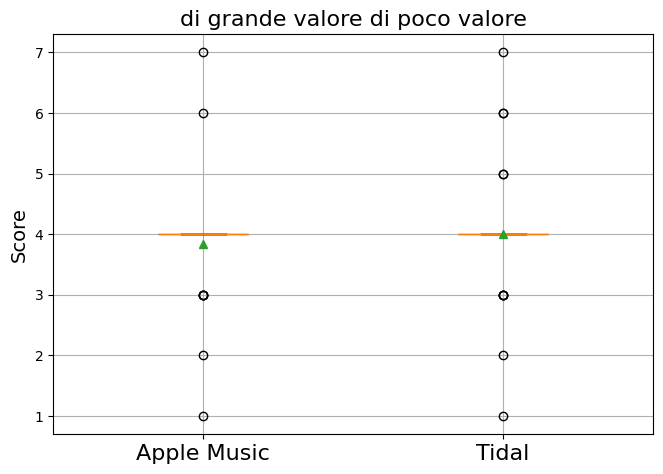

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,6.0,4.12,1.201388,4.0,"[3.624, 4.616]",+/- 0.496
Tidal,1.0,6.0,3.8,1.154701,4.0,"[3.323, 4.277]",+/- 0.477


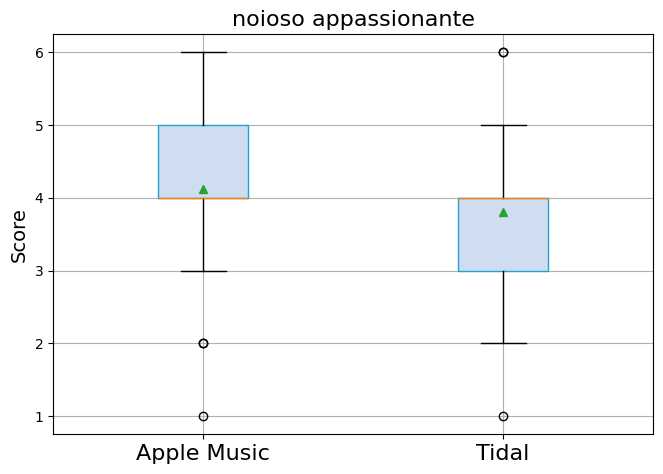

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,7.0,4.44,1.386843,4.0,"[3.868, 5.012]",+/- 0.572
Tidal,1.0,7.0,4.24,1.331666,4.0,"[3.69, 4.79]",+/- 0.55


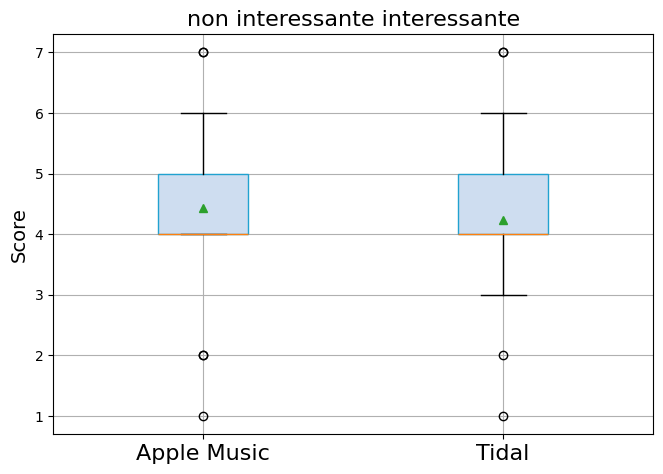

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,7.0,4.64,1.410674,5.0,"[4.058, 5.222]",+/- 0.582
Tidal,1.0,6.0,4.6,1.190238,5.0,"[4.109, 5.091]",+/- 0.491


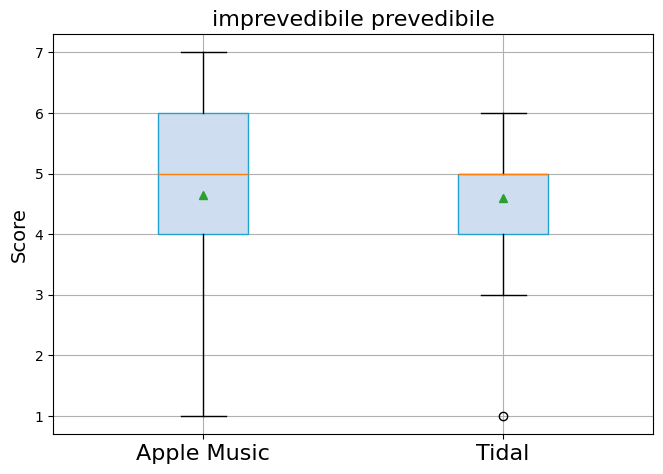

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,5.0,2.68,1.314027,2.0,"[2.138, 3.222]",+/- 0.542
Tidal,1.0,5.0,2.92,1.187434,3.0,"[2.43, 3.41]",+/- 0.49


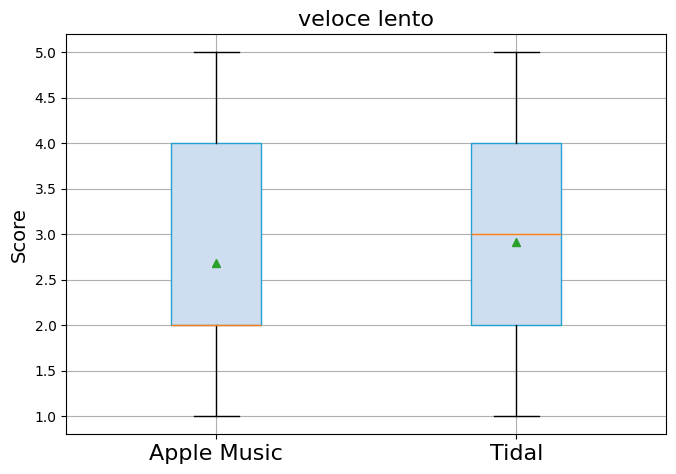

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,2.0,7.0,4.56,1.445683,4.0,"[3.963, 5.157]",+/- 0.597
Tidal,2.0,7.0,4.6,1.47196,5.0,"[3.992, 5.208]",+/- 0.608


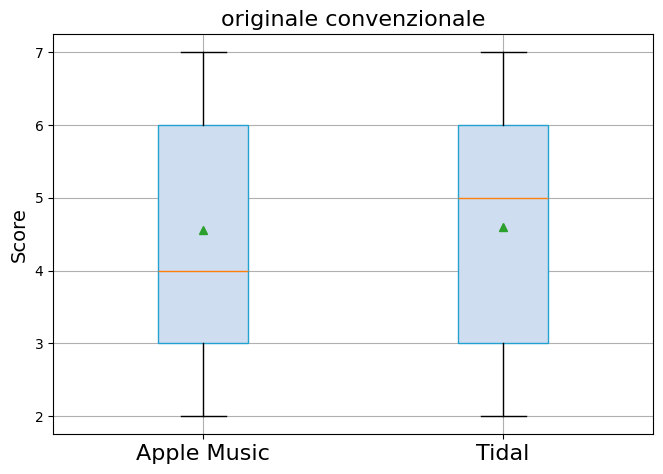

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,2.0,7.0,4.4,1.190238,4.0,"[3.909, 4.891]",+/- 0.491
Tidal,2.0,6.0,4.52,0.918332,4.0,"[4.141, 4.899]",+/- 0.379


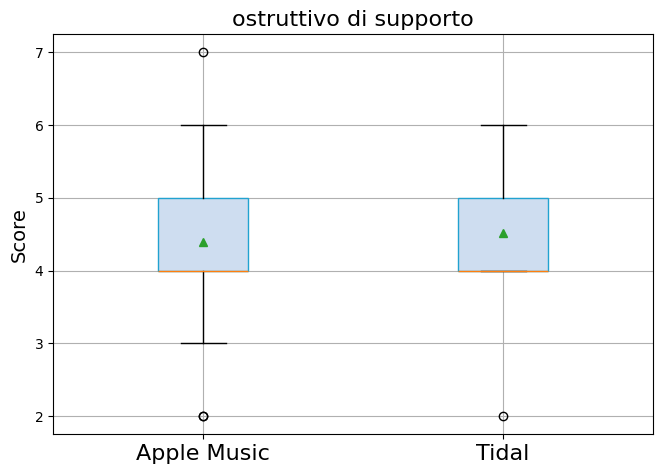

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,5.0,2.96,0.978093,3.0,"[2.556, 3.364]",+/- 0.404
Tidal,1.0,5.0,3.12,1.013246,3.0,"[2.702, 3.538]",+/- 0.418


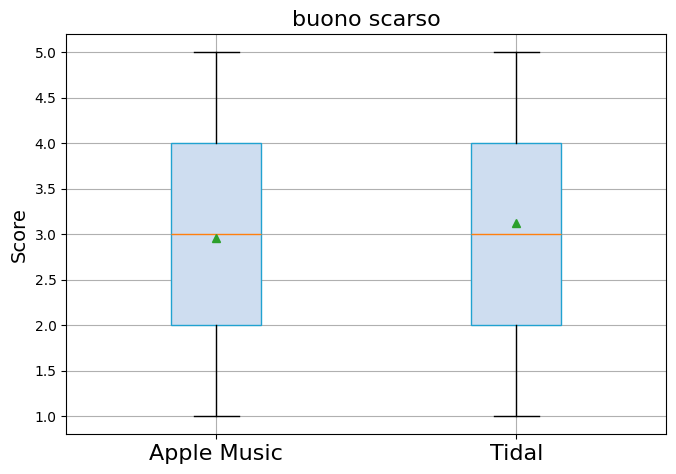

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,7.0,4.88,1.589549,5.0,"[4.224, 5.536]",+/- 0.656
Tidal,1.0,7.0,4.76,1.422439,5.0,"[4.173, 5.347]",+/- 0.587


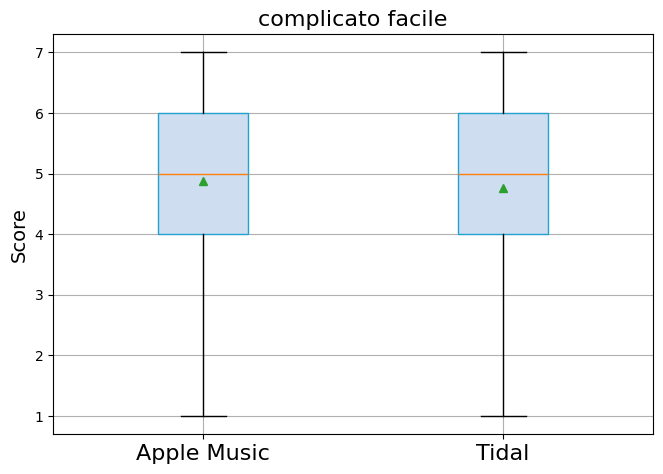

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,3.0,6.0,4.64,0.81035,5.0,"[4.306, 4.974]",+/- 0.334
Tidal,3.0,6.0,4.64,0.81035,5.0,"[4.306, 4.974]",+/- 0.334


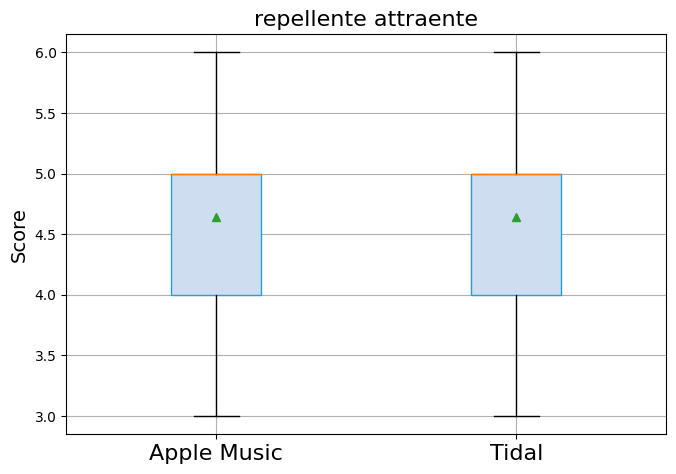

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,2.0,7.0,4.84,1.404754,5.0,"[4.26, 5.42]",+/- 0.58
Tidal,1.0,6.0,4.52,1.557776,5.0,"[3.877, 5.163]",+/- 0.643


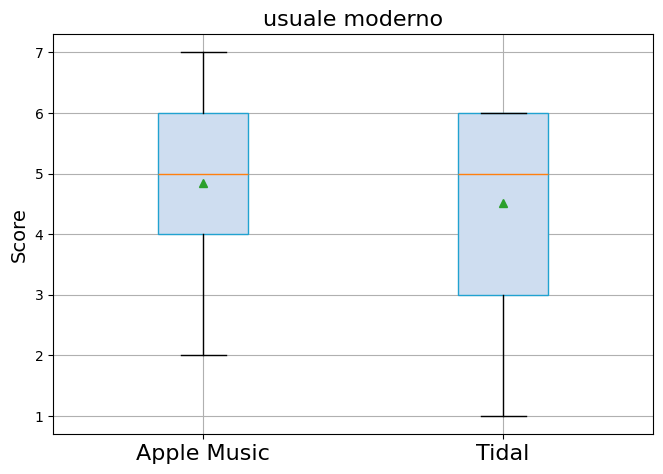

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,3.0,7.0,5.16,1.178983,5.0,"[4.673, 5.647]",+/- 0.487
Tidal,2.0,7.0,4.96,1.059874,5.0,"[4.523, 5.397]",+/- 0.437


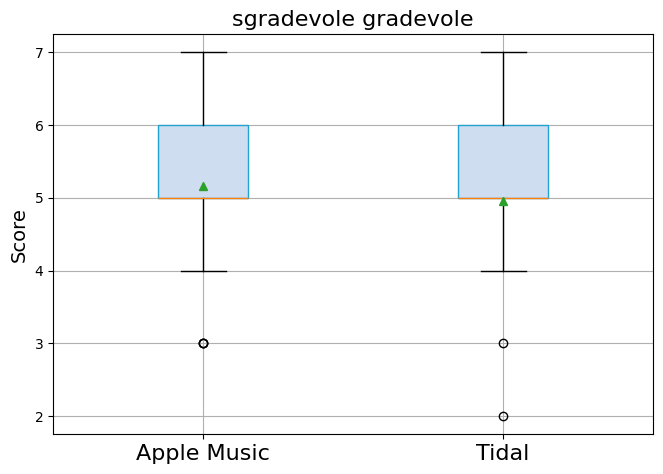

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,6.0,3.4,1.47196,4.0,"[2.792, 4.008]",+/- 0.608
Tidal,1.0,6.0,3.24,1.267544,4.0,"[2.717, 3.763]",+/- 0.523


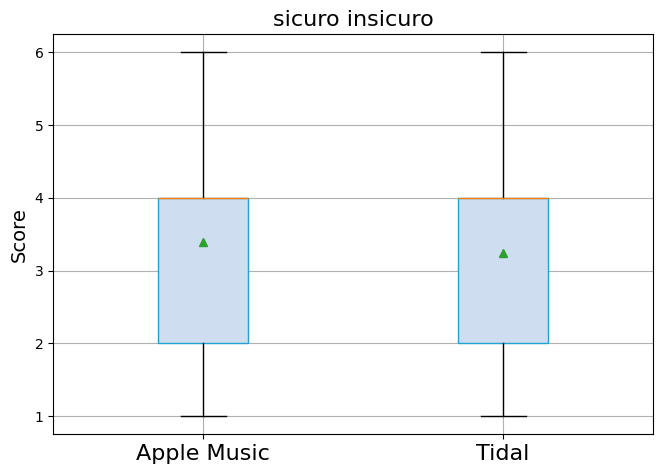

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,6.0,3.64,1.150362,4.0,"[3.165, 4.115]",+/- 0.475
Tidal,2.0,6.0,4.04,1.171893,4.0,"[3.556, 4.524]",+/- 0.484


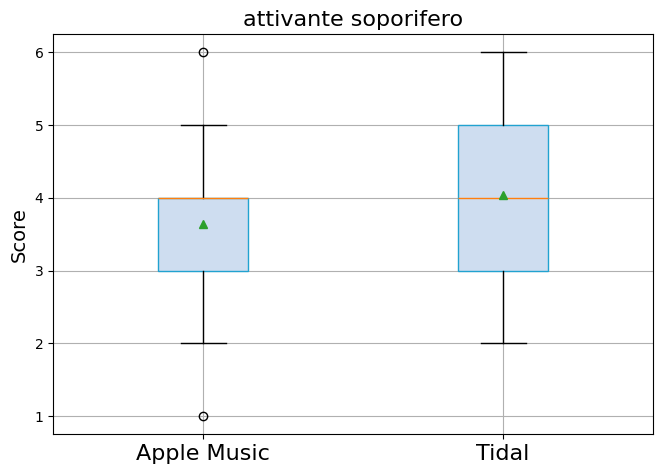

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,6.0,3.16,1.624808,2.0,"[2.489, 3.831]",+/- 0.671
Tidal,1.0,7.0,3.0,1.658312,2.0,"[2.315, 3.685]",+/- 0.685


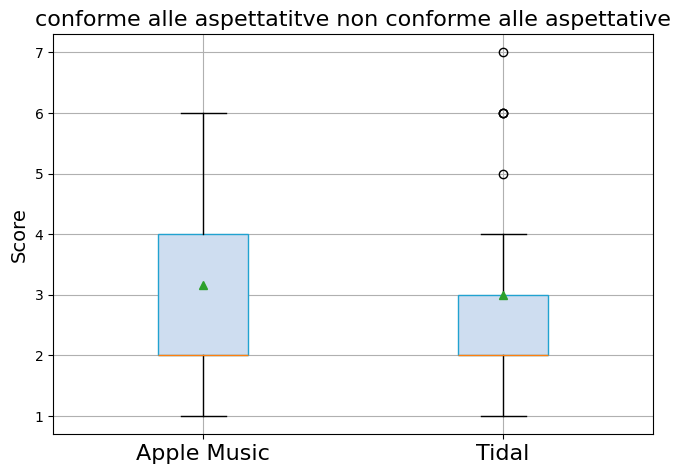

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,3.0,7.0,5.36,1.075484,6.0,"[4.916, 5.804]",+/- 0.444
Tidal,2.0,7.0,5.08,1.22202,5.0,"[4.576, 5.584]",+/- 0.504


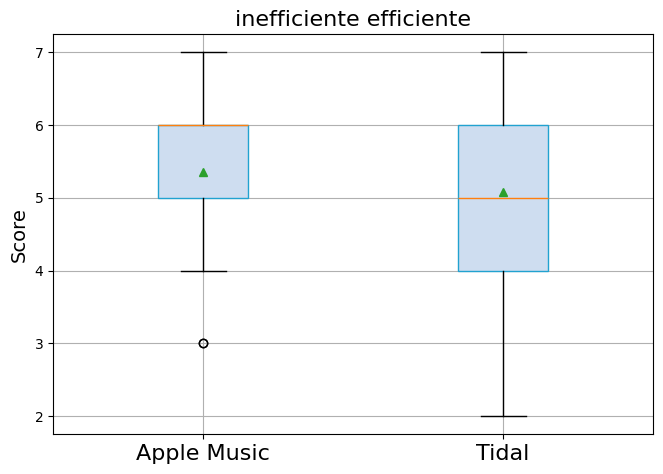

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,6.0,3.6,1.632993,3.0,"[2.926, 4.274]",+/- 0.674
Tidal,1.0,7.0,3.68,1.651262,3.0,"[2.998, 4.362]",+/- 0.682


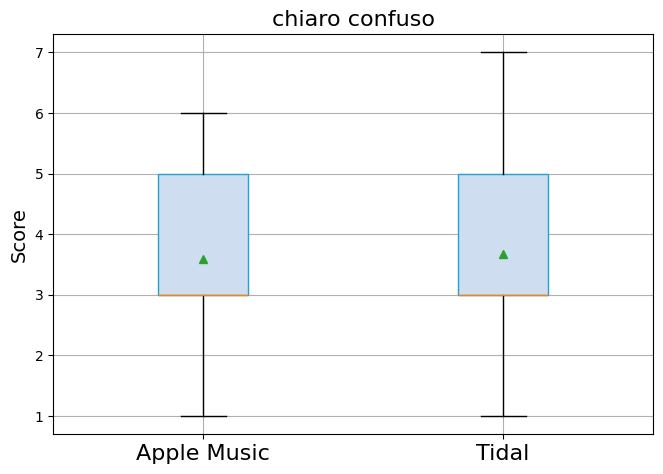

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,2.0,7.0,4.32,1.180395,4.0,"[3.833, 4.807]",+/- 0.487
Tidal,1.0,6.0,4.08,1.187434,4.0,"[3.59, 4.57]",+/- 0.49


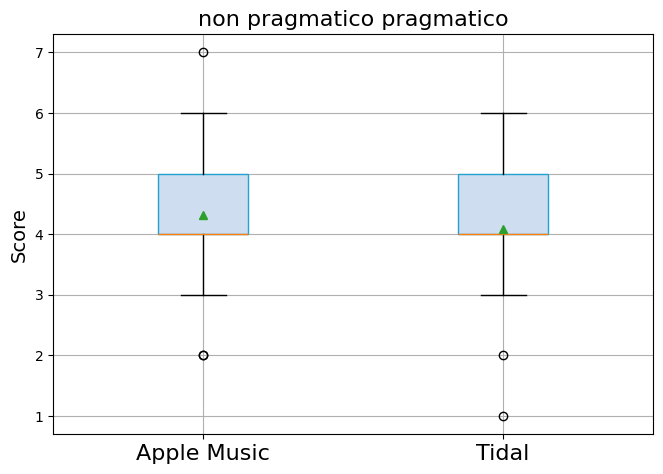

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,6.0,3.76,1.832121,4.0,"[3.004, 4.516]",+/- 0.756
Tidal,1.0,6.0,3.4,1.658312,3.0,"[2.715, 4.085]",+/- 0.685


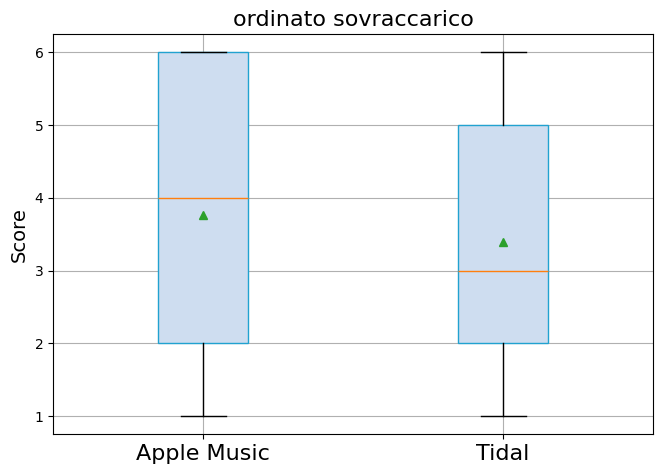

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,7.0,3.4,1.5,3.0,"[2.781, 4.019]",+/- 0.619
Tidal,1.0,7.0,3.44,1.474223,3.0,"[2.831, 4.049]",+/- 0.609


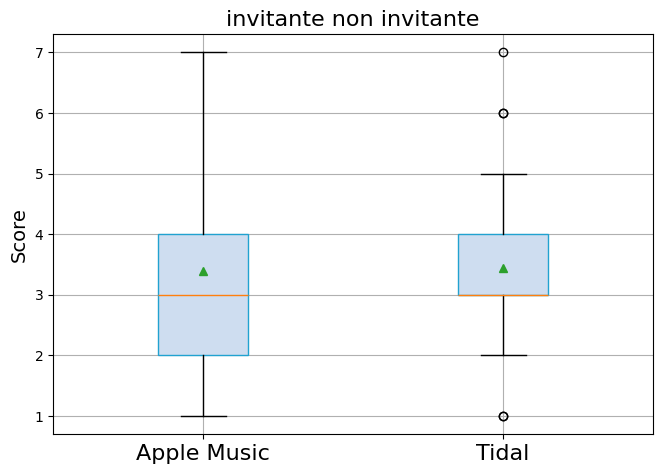

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,1.0,7.0,3.56,1.260952,4.0,"[3.04, 4.08]",+/- 0.52
Tidal,2.0,7.0,3.8,1.190238,4.0,"[3.309, 4.291]",+/- 0.491


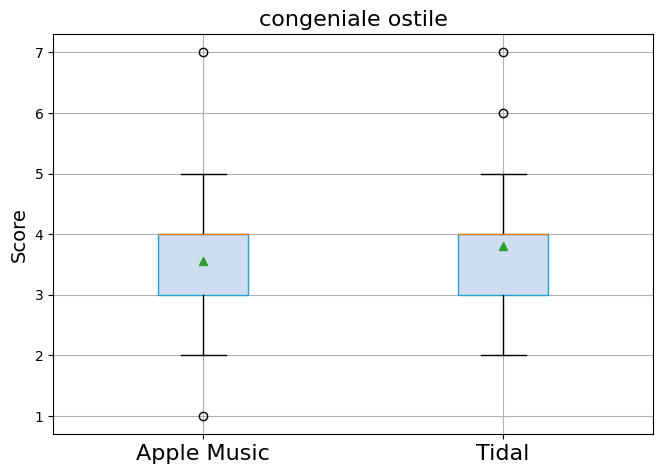

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
Apple Music,2.0,7.0,4.48,1.388044,4.0,"[3.907, 5.053]",+/- 0.573
Tidal,2.0,6.0,4.16,1.280625,4.0,"[3.631, 4.689]",+/- 0.529


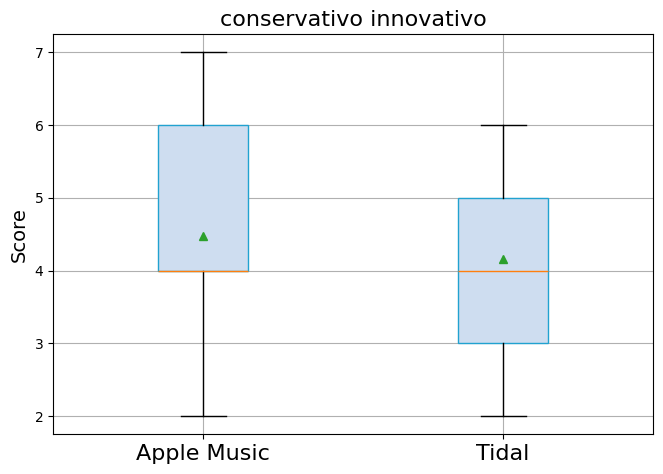

In [4]:
domande1 = questionario1[4:len(questionario1)-1]
domande2 = questionario2[4:len(questionario1)-1]

for index, row in domande1.iterrows():
    quest = domande1.loc[index].to_frame()
    quest = quest.join(domande2.loc[index], lsuffix = '-' + app[0], rsuffix = '-' + app[1])
    quest.columns = app
    quest = quest.astype('float')

    stats = pd.DataFrame(index=app, columns=['Min', 'Max', 'Media', 'Std', 'Mediana', 'Intervallo (0.95)', 'Error'])
    for ele in app:
        stats.loc[ele, 'Min'] = quest[ele].min()
        stats.loc[ele, 'Max'] = quest[ele].max()
        stats.loc[ele, 'Media'] = quest[ele].mean()
        stats.loc[ele, 'Std'] = quest[ele].std()
        stats.loc[ele, 'Mediana'] = quest[ele].median()
        stats.loc[ele, 'Intervallo (0.95)'] = np.around(st.t.interval(0.95, len(quest[ele])-1, loc = np.mean(quest[ele]), scale = st.sem(quest[ele])), 3)
        stats.loc[ele, 'Error'] = '+/- ' + str(np.around(stats.loc[ele, 'Intervallo (0.95)'][1] - stats.loc[ele, 'Media'], 3))
    display(stats)
    print()

    fig = plt.figure(figsize = (6, 4), dpi = 100)
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(quest, patch_artist=True, widths = 0.3, showmeans=True)

    for box in bp['boxes']:
        # change outline color
        # box.set(color='#7570a3')
        box.set(facecolor = palette_c[0])
        box.set(edgecolor = palette_c[2], linewidth=1)
        # fill with colors
        
    #bp['boxes'][0].set(color = palette_c[1])
    #bp['boxes'][1].set(color = palette_c[2])
    plt.grid()
    plt.ylabel('Score', fontsize = 14)
    ax.set_xticklabels(quest.columns, fontsize = 16)
    # title = 
    plt.title(' '.join(index.split('-')), fontsize = 16)
    plt.show()
    

    print('\n\n\n\n\n\n')

In [5]:


print(f'H0: Non ci sono differenze statisticamente significative tra statistica di {app[0]} e statistica di {app[1]}\n\n')

def perform_wilcoxon(test):
    print(f'Wilcoxon test on {test}:')
    x = [int(x) for x in domande1.loc[test].tolist()]
    # x = [5, 5, 5, 6, 4, 5, 2, 3, 4, 2, 3, 2, 5, 5, 5, 4, 3, 4, 7, 6, 6, 5, 5, 5]
    y = [int(x) for x in domande2.loc[test].tolist()]
    # y = [6, 5, 6, 6, 4, 7, 5, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 7, 3, 6, 6, 6, 4]
    w, p = wilcoxon(x = x, y = y, alternative='two-sided')
    print(f'\tw: {w}\n\tp: {p}\n')
    alpha = 0.05
    if p > alpha:
        print(f'p value is greater than alpha ({alpha}), fail to reject H0')
        print('The result is statistically nonsignificant')
        return False
    else:
        print(f'P value is minor than alpha ({alpha}), we can reject H0')
        print('Basically the two systems DO NOT share the same distribution, there are differences! YAY')
        return True


# print(domande1.index)

for ele in domande1.index:
    print(f'RESULT: {perform_wilcoxon(ele)}')
    print('\n\n')


H0: Non ci sono differenze statisticamente significative tra statistica di Apple Music e statistica di Tidal


Wilcoxon test on fastidioso-piacevole:
	w: 22.0
	p: 0.564773144879279

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant
RESULT: False



Wilcoxon test on incomprensibile-comprensibile:
	w: 21.0
	p: 0.8570818600685511

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant
RESULT: False



Wilcoxon test on creativo-privo di fantasia:
	w: 12.5
	p: 0.22695334997944938

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant
RESULT: False



Wilcoxon test on facile da apprendere-difficile da apprendere:
	w: 9.0
	p: 0.3804551252503885

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant
RESULT: False



Wilcoxon test on di grande valore-di poco valore:
	w: 2.0
	p: 0.25683925795785656

p value is great


means Apple Music


attrattivita - Apple Music       4.14
apprendibilita - Apple Music     4.07
efficienza - Apple Music         4.03
controllabilita - Apple Music     3.9
stimolazione - Apple Music       4.01
originalita - Apple Music        4.41
Name: mean, dtype: object

yerr Apple Music


attrattivita - Apple Music       (3.9035350518324616, 4.376464948167538)
apprendibilita - Apple Music     (3.7456659045701444, 4.394334095429856)
efficienza - Apple Music         (3.6981507212437528, 4.361849278756248)
controllabilita - Apple Music    (3.5929948001912577, 4.207005199808742)
stimolazione - Apple Music       (3.764955109793874, 4.2550448902061255)
originalita - Apple Music           (4.12364461301146, 4.69635538698854)
Name: interval, dtype: object

attrattivita - Apple Music      -0.236465
apprendibilita - Apple Music    -0.324334
efficienza - Apple Music        -0.331849
controllabilita - Apple Music   -0.307005
stimolazione - Apple Music      -0.245045
originalita - Apple Music       -0.286355
Name: mean, dtype: object

means Tidal


attrattivita - Tidal       4.16
apprendibilita - Tidal     3.88
efficienza - Tidal         3.87
controllabilita - Tidal    3.84
stimolazione - Tidal       4.02
originalita - Tidal        4.33
Name: mean, dtype: object

yerr Tidal


attrattivita - Tidal       (3.9379765759389542, 4.382023424061046)
apprendibilita - Tidal     (3.5694145186960577, 4.190585481303942)
efficienza - Tidal         (3.5640913551160143, 4.175908644883986)
controllabilita - Tidal     (3.550021944475562, 4.129978055524438)
stimolazione - Tidal        (3.779071328657923, 4.260928671342076)
originalita - Tidal         (4.055037138249782, 4.604962861750218)
Name: interval, dtype: object

attrattivita - Tidal      -0.222023
apprendibilita - Tidal    -0.310585
efficienza - Tidal        -0.305909
controllabilita - Tidal   -0.289978
stimolazione - Tidal      -0.240929
originalita - Tidal       -0.274963
Name: mean, dtype: object

ValueError: 'yerr' must not contain negative values

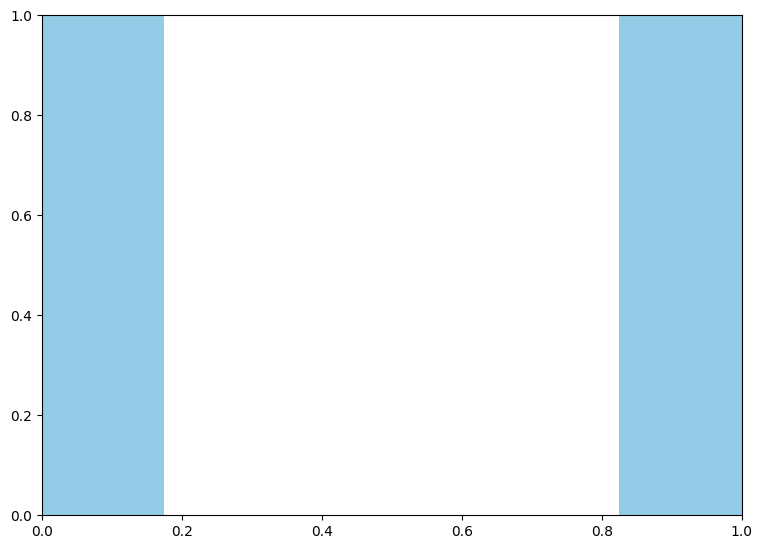

In [6]:
# other interesting stats here:

categorie1 = {'attrattivita': [], 'apprendibilita': [], 'efficienza': [], 'controllabilita': [], 'stimolazione': [], 'originalita': []}

categorie1['attrattivita'].extend([int(x) for x in domande1.loc['fastidioso-piacevole'].tolist()])
categorie1['attrattivita'].extend([int(x) for x in domande1.loc['buono-scarso'].tolist()])
categorie1['attrattivita'].extend([int(x) for x in domande1.loc['repellente-attraente'].tolist()])
categorie1['attrattivita'].extend([int(x) for x in domande1.loc['sgradevole-gradevole'].tolist()])
categorie1['attrattivita'].extend([int(x) for x in domande1.loc['invitante-non invitante'].tolist()])
categorie1['attrattivita'].extend([int(x) for x in domande1.loc['congeniale-ostile'].tolist()])

categorie1['apprendibilita'].extend([int(x) for x in domande1.loc['incomprensibile-comprensibile'].tolist()])
categorie1['apprendibilita'].extend([int(x) for x in domande1.loc['facile da apprendere-difficile da apprendere'].tolist()])
categorie1['apprendibilita'].extend([int(x) for x in domande1.loc['non pragmatico-pragmatico'].tolist()])
categorie1['apprendibilita'].extend([int(x) for x in domande1.loc['ordinato-sovraccarico'].tolist()])

categorie1['efficienza'].extend([int(x) for x in domande1.loc['veloce-lento'].tolist()])
categorie1['efficienza'].extend([int(x) for x in domande1.loc['inefficiente-efficiente'].tolist()])
categorie1['efficienza'].extend([int(x) for x in domande1.loc['non pragmatico-pragmatico'].tolist()])
categorie1['efficienza'].extend([int(x) for x in domande1.loc['ordinato-sovraccarico'].tolist()])

categorie1['controllabilita'].extend([int(x) for x in domande1.loc['imprevedibile-prevedibile'].tolist()])
categorie1['controllabilita'].extend([int(x) for x in domande1.loc['ostruttivo-di supporto'].tolist()])
categorie1['controllabilita'].extend([int(x) for x in domande1.loc['sicuro-insicuro'].tolist()])
categorie1['controllabilita'].extend([int(x) for x in domande1.loc['conforme alle aspettatitve-non conforme alle aspettative'].tolist()])

categorie1['stimolazione'].extend([int(x) for x in domande1.loc['di grande valore-di poco valore'].tolist()])
categorie1['stimolazione'].extend([int(x) for x in domande1.loc['noioso-appassionante'].tolist()])
categorie1['stimolazione'].extend([int(x) for x in domande1.loc['non interessante-interessante'].tolist()])
categorie1['stimolazione'].extend([int(x) for x in domande1.loc['attivante-soporifero'].tolist()])

categorie1['originalita'].extend([int(x) for x in domande1.loc['creativo-privo di fantasia'].tolist()])
categorie1['originalita'].extend([int(x) for x in domande1.loc['originale-convenzionale'].tolist()])
categorie1['originalita'].extend([int(x) for x in domande1.loc['usuale-moderno'].tolist()])
categorie1['originalita'].extend([int(x) for x in domande1.loc['conservativo-innovativo'].tolist()])



categorie2 = {'attrattivita': [], 'apprendibilita': [], 'efficienza': [], 'controllabilita': [], 'stimolazione': [], 'originalita': []}

categorie2['attrattivita'].extend([int(x) for x in domande2.loc['fastidioso-piacevole'].tolist()])
categorie2['attrattivita'].extend([int(x) for x in domande2.loc['buono-scarso'].tolist()])
categorie2['attrattivita'].extend([int(x) for x in domande2.loc['repellente-attraente'].tolist()])
categorie2['attrattivita'].extend([int(x) for x in domande2.loc['sgradevole-gradevole'].tolist()])
categorie2['attrattivita'].extend([int(x) for x in domande2.loc['invitante-non invitante'].tolist()])
categorie2['attrattivita'].extend([int(x) for x in domande2.loc['congeniale-ostile'].tolist()])

categorie2['apprendibilita'].extend([int(x) for x in domande2.loc['incomprensibile-comprensibile'].tolist()])
categorie2['apprendibilita'].extend([int(x) for x in domande2.loc['facile da apprendere-difficile da apprendere'].tolist()])
categorie2['apprendibilita'].extend([int(x) for x in domande2.loc['non pragmatico-pragmatico'].tolist()])
categorie2['apprendibilita'].extend([int(x) for x in domande2.loc['ordinato-sovraccarico'].tolist()])

categorie2['efficienza'].extend([int(x) for x in domande2.loc['veloce-lento'].tolist()])
categorie2['efficienza'].extend([int(x) for x in domande2.loc['inefficiente-efficiente'].tolist()])
categorie2['efficienza'].extend([int(x) for x in domande2.loc['non pragmatico-pragmatico'].tolist()])
categorie2['efficienza'].extend([int(x) for x in domande2.loc['ordinato-sovraccarico'].tolist()])

categorie2['controllabilita'].extend([int(x) for x in domande2.loc['imprevedibile-prevedibile'].tolist()])
categorie2['controllabilita'].extend([int(x) for x in domande2.loc['ostruttivo-di supporto'].tolist()])
categorie2['controllabilita'].extend([int(x) for x in domande2.loc['sicuro-insicuro'].tolist()])
categorie2['controllabilita'].extend([int(x) for x in domande2.loc['conforme alle aspettatitve-non conforme alle aspettative'].tolist()])

categorie2['stimolazione'].extend([int(x) for x in domande2.loc['di grande valore-di poco valore'].tolist()])
categorie2['stimolazione'].extend([int(x) for x in domande2.loc['noioso-appassionante'].tolist()])
categorie2['stimolazione'].extend([int(x) for x in domande2.loc['non interessante-interessante'].tolist()])
categorie2['stimolazione'].extend([int(x) for x in domande2.loc['attivante-soporifero'].tolist()])

categorie2['originalita'].extend([int(x) for x in domande2.loc['creativo-privo di fantasia'].tolist()])
categorie2['originalita'].extend([int(x) for x in domande2.loc['originale-convenzionale'].tolist()])
categorie2['originalita'].extend([int(x) for x in domande2.loc['usuale-moderno'].tolist()])
categorie2['originalita'].extend([int(x) for x in domande2.loc['conservativo-innovativo'].tolist()])



df_categ1 = pd.DataFrame(index = [], columns = ['mean', 'std', 'interval', 'data'])
for categ in categorie1:
    df_categ1.loc[categ + ' - ' + app[0], 'mean'] = np.mean(categorie1[categ])
    df_categ1.loc[categ + ' - ' + app[0], 'std'] = np.std(categorie1[categ])
    df_categ1.loc[categ + ' - ' + app[0], 'interval'] = st.t.interval(0.95, len(categorie1[categ])-1, loc = np.mean(categorie1[categ]), scale = st.sem(categorie1[categ]))
    df_categ1.at[categ + ' - ' + app[0], 'data'] = categorie1[categ]

df_categ2 = pd.DataFrame(index = [], columns = ['mean', 'std', 'interval', 'data'])
for categ in categorie2:
    df_categ2.loc[categ + ' - ' + app[1], 'mean'] = np.mean(categorie2[categ])
    df_categ2.loc[categ + ' - ' + app[1], 'std'] = np.std(categorie2[categ])
    df_categ2.loc[categ + ' - ' + app[1], 'interval'] = st.t.interval(0.95, len(categorie2[categ])-1, loc = np.mean(categorie2[categ]), scale = st.sem(categorie2[categ]))
    df_categ2.at[categ + ' - ' + app[1], 'data'] = categorie2[categ]

#display(df_categ1)
#display(df_categ2)

fig = plt.figure(figsize = (7, 5), dpi = 100)
ax = fig.add_axes([0, 0, 1, 1])
X = np.arange(len(categorie1))
bar_width = 0.35
print()
yerr1 = df_categ1['mean'] - [ele[1] for ele in df_categ1['interval']]
print(f'means {app[0]}')
display(df_categ1['mean'])
print(f'yerr {app[0]}')
display(df_categ1['interval'])
display(yerr1)

yerr2 = df_categ2['mean'] - [ele[1] for ele in df_categ2['interval']]
print(f'means {app[1]}')
display(df_categ2['mean'])
print(f'yerr {app[1]}')
display(df_categ2['interval'])
display(yerr2)

ax.bar(X, df_categ1['mean'], yerr = yerr1, width = bar_width, label = app[0], color = palette_c[1])
ax.bar(X + bar_width, df_categ2['mean'], yerr = yerr2, width = bar_width, label = app[1], color = palette_c[3])
ax.set_xlabel('Categoria', fontsize = 12)
ax.set_ylabel('Punteggio', fontsize = 12)
ax.set_ylim([0,7])
ax.set_xticks(X + bar_width /2)
ax.set_xticklabels([ele for ele in categorie1])
ax.legend()
# plt.grid()
plt.show()



# perform Wilcoxon on every category:
for categ in categorie1:
    print('\n\n___________________________\n')
    print(f'Wilcoxon test on {categ}:')
    x = df_categ1.loc[categ + ' - ' + app[0], 'data']
    y = df_categ2.loc[categ + ' - ' + app[1], 'data']
    w, p = wilcoxon(x = x, y = y, alternative='two-sided')
    print(f'\tw: {w}\n\tp: {p}\n')
    alpha = 0.05
    if p > alpha:
        print(f'p value is greater than alpha ({alpha}), fail to reject H0')
        print('The result is statistically nonsignificant')
    else:
        print(f'P value is minor than alpha ({alpha}), we can reject H0')
        print('Basically the two systems DO NOT share the same distribution, there are differences! YAY')
    


### NPS:

In [ ]:
# get last row (NPS)
# detrattori 0-6 compresi
# passivi 7-8
# promotori 9-10
# NPS = % promotori - % detrattori

nps_class = [0, 7, 9, 10]
labels = ['0-6', '7-8', '9-10']
scores1 = [int(ele) for ele in questionario1.iloc[-1]]
scores2 = [int(ele) for ele in questionario2.iloc[-1]]
df_nps1 = pd.DataFrame({'score': scores1, 'group': pd.cut(scores1, bins = nps_class, labels = labels, right = False)})
#display(df_nps1)
df_nps2 = pd.DataFrame({'score': scores2, 'group': pd.cut(scores2, bins = nps_class, labels = labels, right = False)})
#display(df_nps2)

sizes1 = df_nps1['group'].value_counts()
#display(sizes1)
# sizes1 = sizes1[sizes != 0] # drop 0 value
sizes2 = df_nps2['group'].value_counts()
#display(sizes2)

# sizes2 = sizes2[sizes != 0] # drop 0 value

# plotting first system here
labels = list(sizes1.index)
# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes1))
explode[np.where(sizes1.index == sizes1.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes1, explode = explode, labels = labels, autopct='%1.0f%%', shadow = True, startangle = 90, colors = palette_c)
plt.title(f'Net Promoter Score per {app[0]}')
plt.legend(['Passivi', 'Promotori', 'Detrattori'])
plt.show()


# plotting second system here
labels = list(sizes2.index)
# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes2))
explode[np.where(sizes2.index == sizes2.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes2, explode = explode, labels = labels, autopct='%1.0f%%', shadow = True, startangle = 90, colors = palette_c)
plt.title(f'Net Promoter Score per {app[1]}')
# TODO: controlla la correttezza della seconda legenda!!!
# plt.legend(['Passivi', 'Promotori', 'Detrattori'])
plt.show()

In [ ]:
p_nps1 = pd.DataFrame(sizes1.items(), columns=['item', 'score'])
p_nps1['perc'] = np.around(p_nps1['score']/p_nps1['score'].sum()*100, 1)
p_nps1 = p_nps1.set_index('item')
display(p_nps1)
nps_1 = p_nps1.loc['9-10', 'perc'] - p_nps1.loc['0-6', 'perc']
print(f'\nIl Net Promoter Score di {app[0]} è: {nps_1}')

print('\n____\n')

p_nps2 = pd.DataFrame(sizes2.items(), columns=['item', 'score'])
p_nps2['perc'] = np.around(p_nps2['score']/p_nps2['score'].sum()*100, 1)
p_nps2 = p_nps2.set_index('item')
display(p_nps2)
nps_2 = p_nps2.loc['9-10', 'perc'] - p_nps2.loc['0-6', 'perc']
print(f'\nIl Net Promoter Score di {app[1]} è: {nps_2}')

print('\n____\n')

width = 0.45
fig = plt.figure(figsize = (4, 5), dpi = 100)
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(1, nps_1, width, label = f'NPS {app[0]}', color = palette_c[1])
plt.annotate(f'{nps_1}', (1, nps_1/2), ha='center', va='center', size = 14)

ax.bar(2, nps_2, width, label = f'NPS {app[1]}', color = palette_c[3])
plt.annotate(f'{nps_2}', (2, nps_2/2), ha='center', va='center', size = 14)

plt.axhline(y = 0,linewidth = 1.5, color='tab:orange')
plt.legend()
plt.title(f'Net Promoter Score {app[0]} vs {app[1]}')
plt.xticks([1, 2], app)
#plt.grid()
plt.show()